In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import datetime

## 1. About Data

In [2]:
# Read the dataset
sales = pd.read_excel('Sales_Data.xlsx')

In [3]:
# Checking first 5 rows in the data
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [4]:
# Checking last 5 rows in the data
sales.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small
2746,10414,47,65.52,9,3079.44,2020-05-06,2772,On Hold,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,Boston,51003,USA,Yoshido,Juri,Medium


In [5]:
# To check datatype of each column
sales.dtypes

ORDERNUMBER                      int64
QUANTITYORDERED                  int64
PRICEEACH                      float64
ORDERLINENUMBER                  int64
SALES                          float64
ORDERDATE               datetime64[ns]
DAYS_SINCE_LASTORDER             int64
STATUS                          object
PRODUCTLINE                     object
MSRP                             int64
PRODUCTCODE                     object
CUSTOMERNAME                    object
PHONE                           object
ADDRESSLINE1                    object
CITY                            object
POSTALCODE                      object
COUNTRY                         object
CONTACTLASTNAME                 object
CONTACTFIRSTNAME                object
DEALSIZE                        object
dtype: object

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [7]:
# To check summary of data
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [8]:
# To check duplicates in the data
dups = sales.duplicated().sum()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [9]:
# Before removing duplicates
sales.shape

(2747, 20)

In [10]:
sales.duplicated().sum()

0

In [11]:
sales.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [12]:
num =['ORDERNUMBER','QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'DAYS_SINCE_LASTORDER', 'MSRP']

## 2. Exploratory Analysis and Inferences

### Univariate Analysis

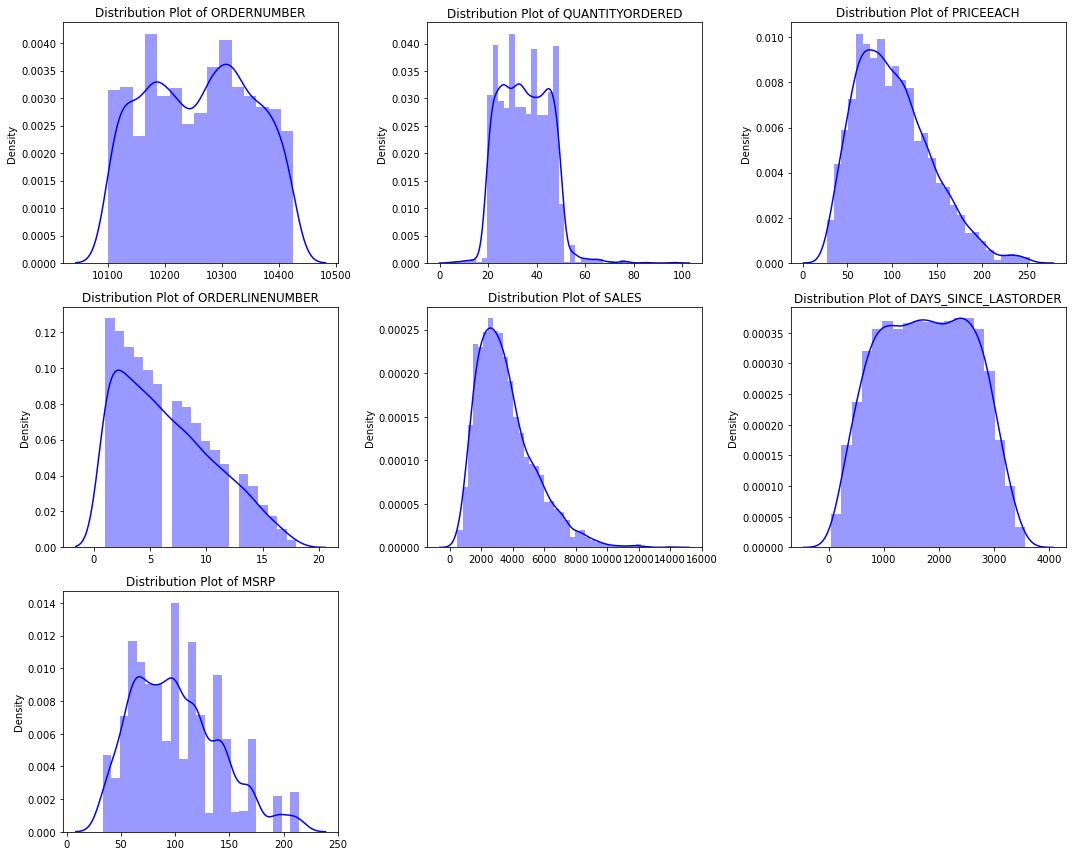

In [13]:
plt.figure(figsize = (15,12))
feature_list = num
for i in range(len(feature_list)):
    plt.subplot(3,3,i+1)
    sns.distplot(x=sales[feature_list[i]], color='b',fit = None)
    plt.title('Distribution Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

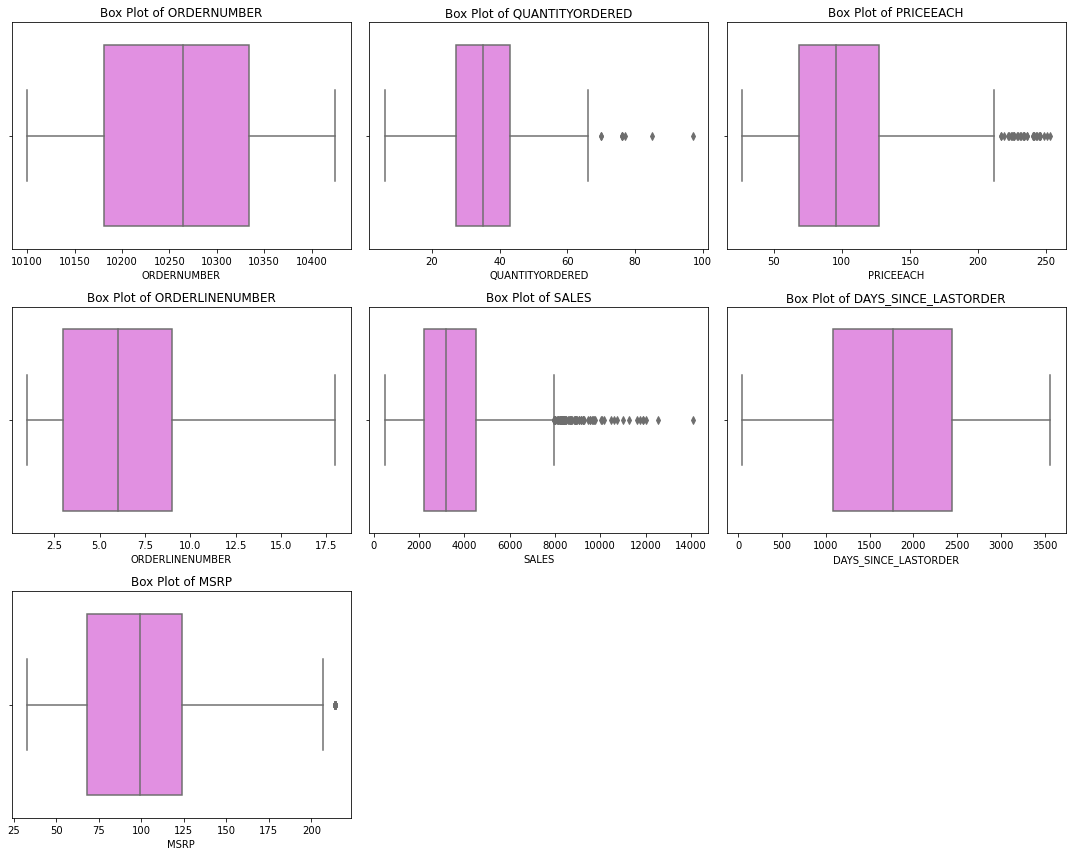

In [14]:
plt.figure(figsize = (15,12))
feature_list = num
for i in range(len(feature_list)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=sales[feature_list[i]], color='violet')
    plt.title('Box Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

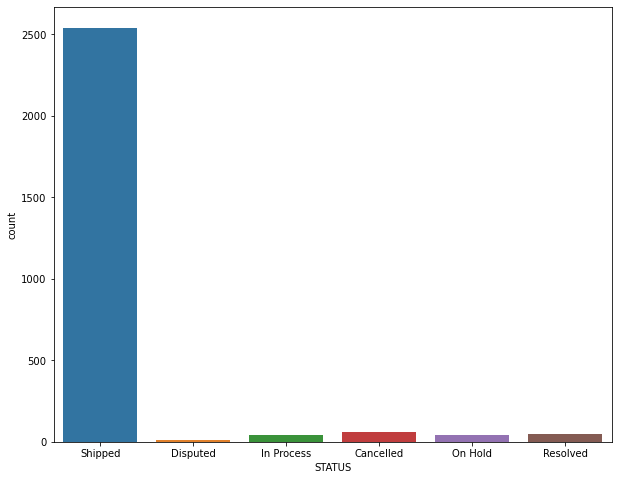

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(x='STATUS',data=sales);

## Bivariate Analysis

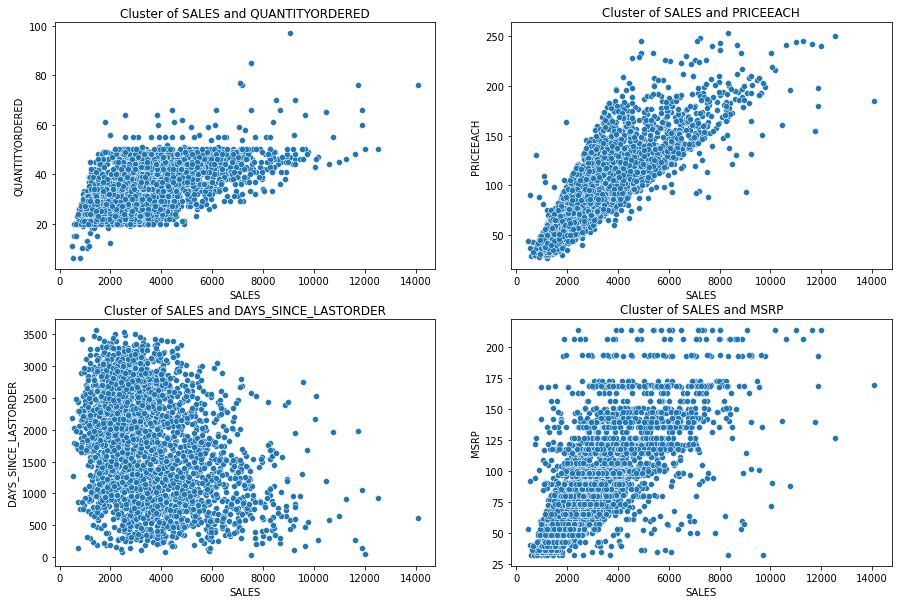

In [16]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(x='SALES', y='QUANTITYORDERED', data=sales)
plt.title('Cluster of SALES and QUANTITYORDERED')

plt.subplot(2,2,2)
sns.scatterplot(x='SALES', y='PRICEEACH', data=sales)
plt.title('Cluster of SALES and PRICEEACH')

plt.subplot(2,2,3)
sns.scatterplot(x='SALES', y='DAYS_SINCE_LASTORDER', data=sales)
plt.title('Cluster of SALES and DAYS_SINCE_LASTORDER')

plt.subplot(2,2,4)
sns.scatterplot(x='SALES', y='MSRP', data=sales)
plt.title('Cluster of SALES and MSRP');


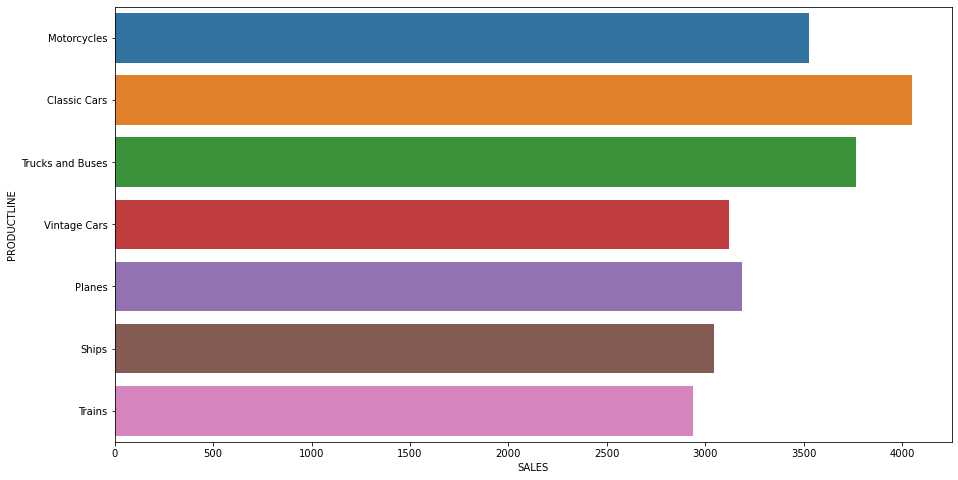

In [17]:
plt.figure(figsize=(15,8))
sns.barplot(x=sales['SALES'],y=sales['PRODUCTLINE'],ci=None);

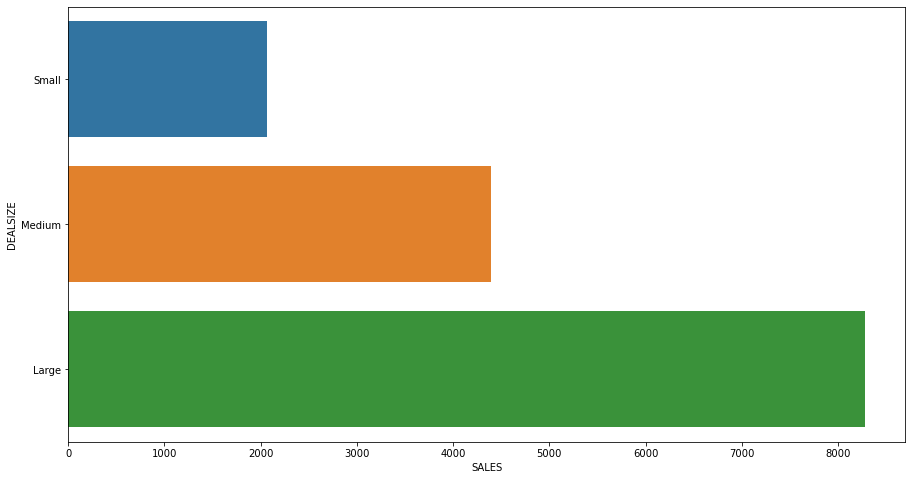

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(x=sales['SALES'],y=sales['DEALSIZE'],ci=None);

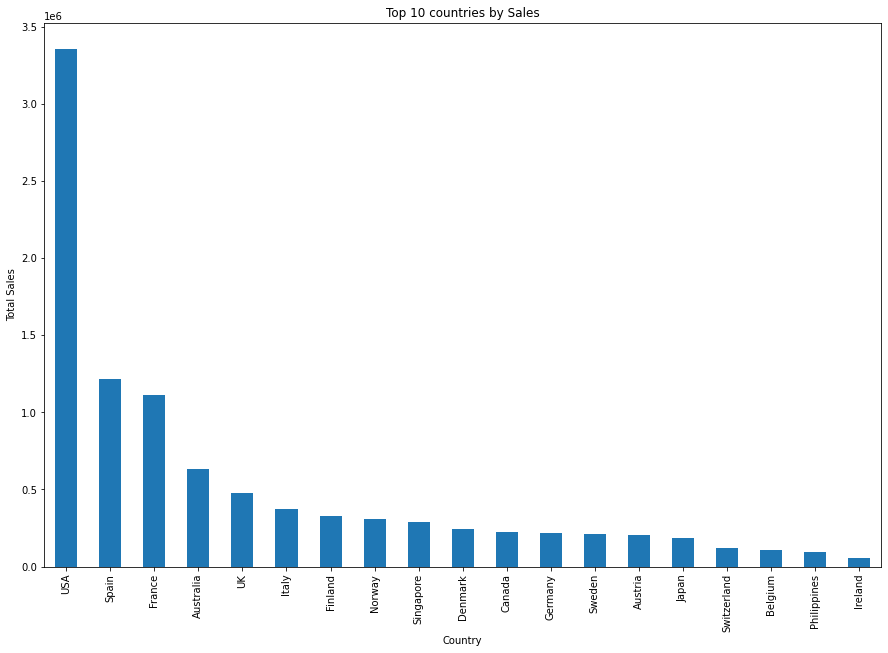

In [19]:
plt.figure(figsize=(15,10))
Top_country = sales.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False)
Top_country.plot(kind = 'bar')
plt.title('Top 10 countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show();

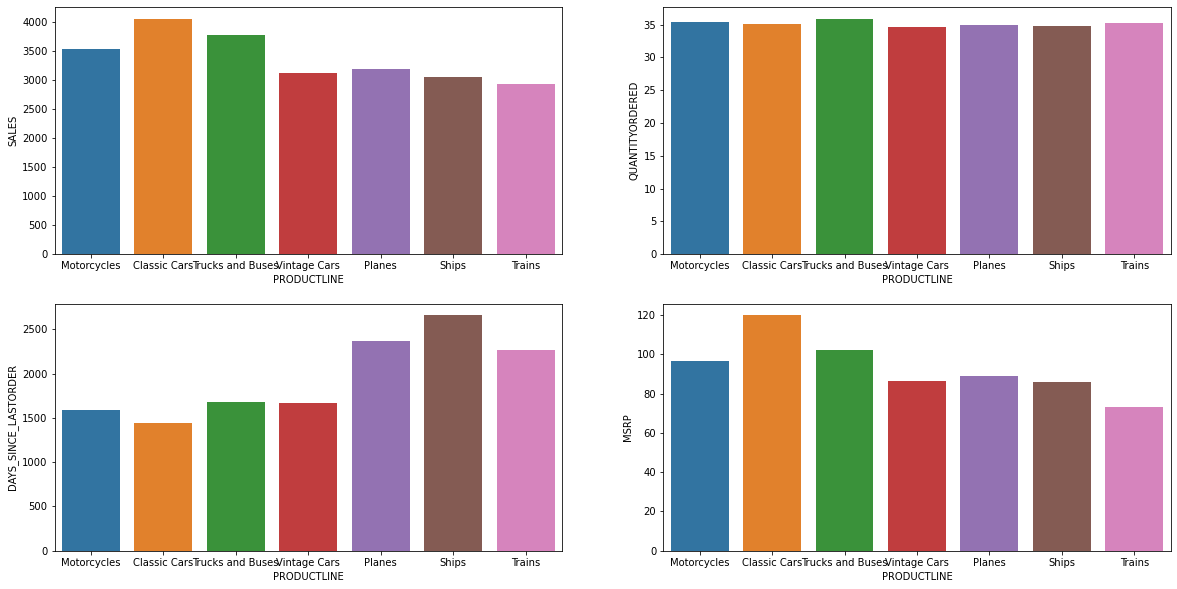

In [20]:
fig,axes = plt.subplots(nrows = 2,ncols = 2)
fig.set_size_inches(20,10)
sns.barplot(x='PRODUCTLINE',y='SALES',data = sales,ax=axes[0][0],ci=None)
sns.barplot(x='PRODUCTLINE',y='QUANTITYORDERED',data = sales,ax=axes[0][1],ci=None)
sns.barplot(x='PRODUCTLINE',y='DAYS_SINCE_LASTORDER',data = sales,ax=axes[1][0],ci=None)
sns.barplot(x='PRODUCTLINE',y='MSRP',data = sales,ax=axes[1][1],ci=None);

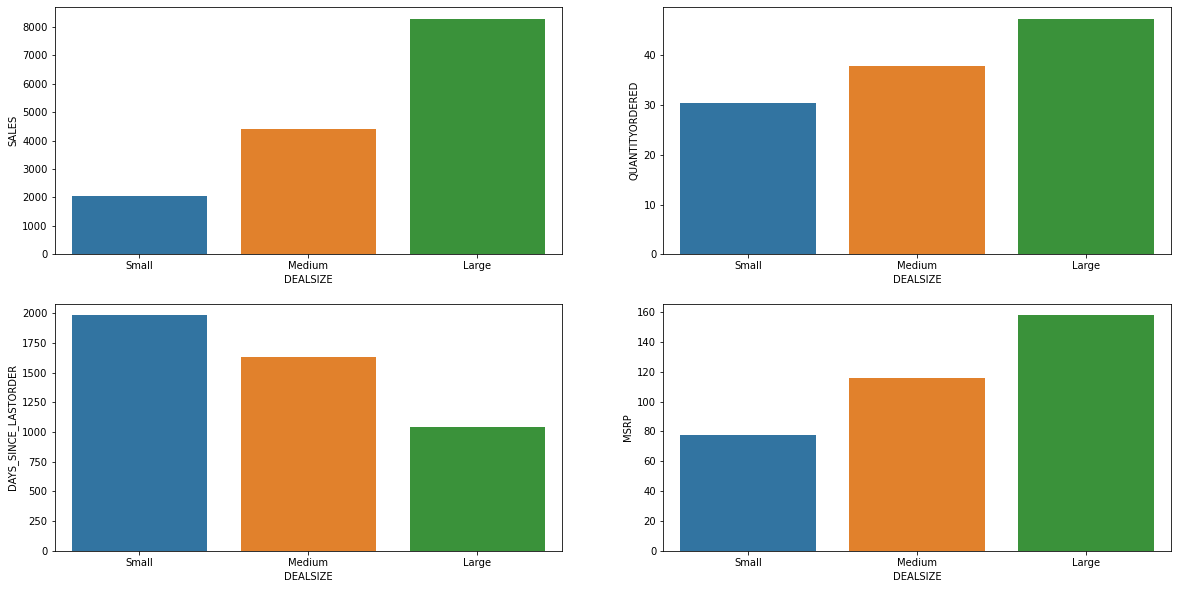

In [21]:
fig,axes = plt.subplots(nrows = 2,ncols = 2)
fig.set_size_inches(20,10)
sns.barplot(x='DEALSIZE',y='SALES',data = sales,ax=axes[0][0],ci=None)
sns.barplot(x='DEALSIZE',y='QUANTITYORDERED',data = sales,ax=axes[0][1],ci=None)
sns.barplot(x='DEALSIZE',y='DAYS_SINCE_LASTORDER',data = sales,ax=axes[1][0],ci=None)
sns.barplot(x='DEALSIZE',y='MSRP',data = sales,ax=axes[1][1],ci=None);

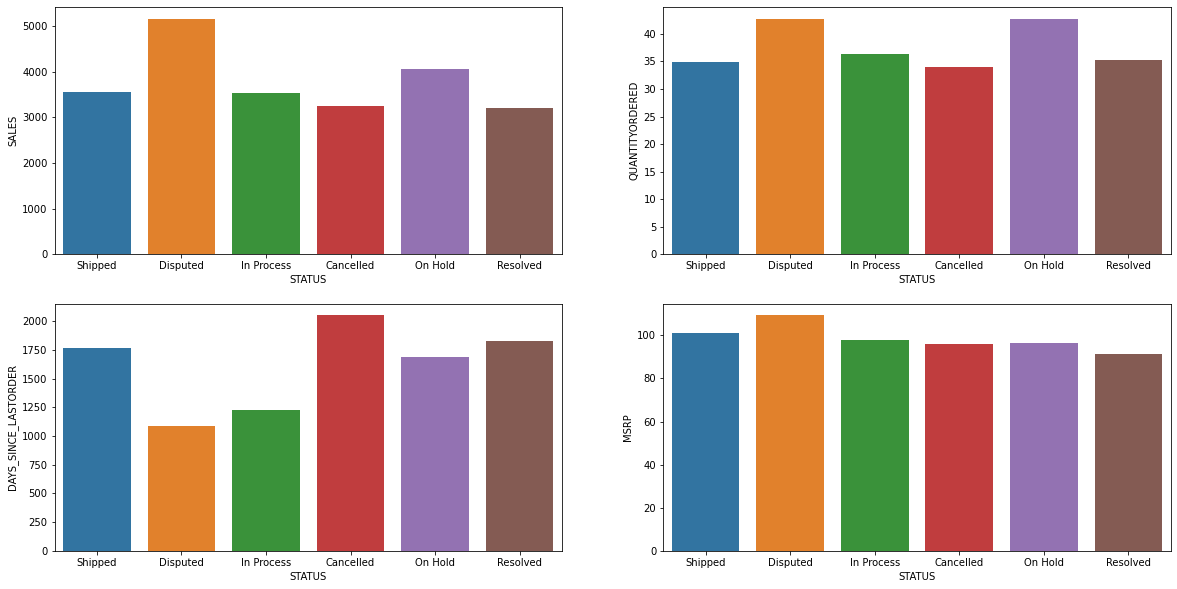

In [22]:
fig,axes = plt.subplots(nrows = 2,ncols = 2)
fig.set_size_inches(20,10)
sns.barplot(x='STATUS',y='SALES',data = sales,ax=axes[0][0],ci=None)
sns.barplot(x='STATUS',y='QUANTITYORDERED',data = sales,ax=axes[0][1],ci=None)
sns.barplot(x='STATUS',y='DAYS_SINCE_LASTORDER',data = sales,ax=axes[1][0],ci=None)
sns.barplot(x='STATUS',y='MSRP',data = sales,ax=axes[1][1],ci=None);

### Multivariate Analysis

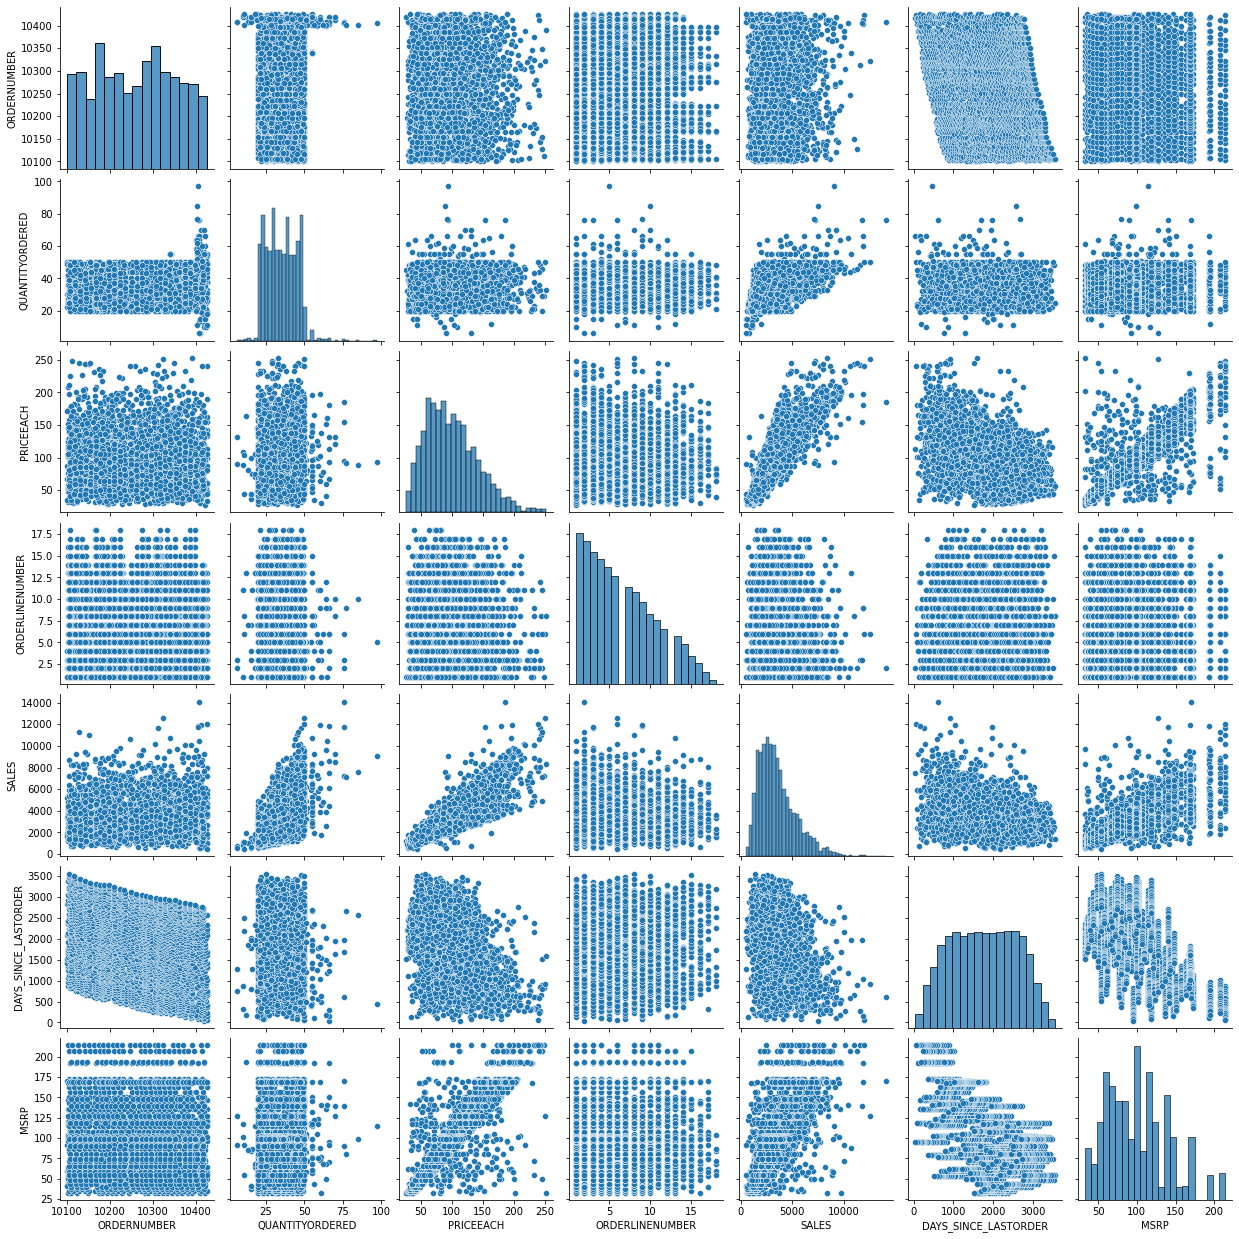

In [23]:
sns.pairplot(sales);

In [24]:
g = sales.corr()
g

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
ORDERNUMBER,1.000000,0.067110,-0.003369,-0.054300,0.037289,-0.251476,-0.013910
QUANTITYORDERED,0.067110,1.000000,0.010161,-0.016295,0.553359,-0.021923,0.020551
PRICEEACH,-0.003369,0.010161,1.000000,-0.052646,0.808287,-0.397092,0.778393
ORDERLINENUMBER,-0.054300,-0.016295,-0.052646,1.000000,-0.057414,0.046615,-0.020956
SALES,0.037289,0.553359,0.808287,-0.057414,1.000000,-0.334274,0.634849
DAYS_SINCE_LASTORDER,-0.251476,-0.021923,-0.397092,0.046615,-0.334274,1.000000,-0.524285
MSRP,-0.013910,0.020551,0.778393,-0.020956,0.634849,-0.524285,1.000000


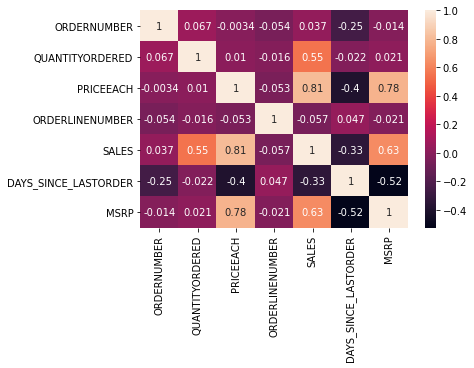

In [25]:
sns.heatmap(g,annot=True);

## 3. Customer Segmentation using RFM analysis

### RFM Analysis

In [26]:
num = ['CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE', 'SALES']

In [27]:
RFM_sales= sales[num]
RFM_sales.head()

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2018-02-24,2871.00
1,Reims Collectables,10121,2018-05-07,2765.90
2,Lyon Souveniers,10134,2018-07-01,3884.34
3,Toys4GrownUps.com,10145,2018-08-25,3746.70
4,Technics Stores Inc.,10168,2018-10-28,3479.76


In [28]:
RFM_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CUSTOMERNAME  2747 non-null   object        
 1   ORDERNUMBER   2747 non-null   int64         
 2   ORDERDATE     2747 non-null   datetime64[ns]
 3   SALES         2747 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 86.0+ KB


In [29]:
last_date = dt.datetime(2020,5,31)

In [30]:
current_date = datetime.now()

In [31]:
sales_recency = sales.groupby(by='CUSTOMERNAME',as_index=False)['ORDERDATE'].max()
sales_recency.columns = ['CUSTOMERNAME', 'last_date']
recent_date = sales_recency['last_date'].max()
sales_recency['Recency'] = sales_recency['last_date'].apply(lambda x: (current_date - x).days)
sales_recency.head()


,CUSTOMERNAME,last_date,Recency
0,"AV Stores, Co.",2019-11-17,994
1,Alpha Cognac,2020-03-28,862
2,Amica Models & Co.,2019-09-09,1063
3,"Anna's Decorations, Ltd",2020-03-09,881
4,Atelier graphique,2019-11-25,986


In [32]:
frequency_sales = sales.drop_duplicates().groupby(by=['CUSTOMERNAME'], as_index=False)['ORDERDATE'].count()
frequency_sales.columns = ['CUSTOMERNAME', 'Frequency']
frequency_sales.head()


,CUSTOMERNAME,Frequency
0,"AV Stores, Co.",51
1,Alpha Cognac,20
2,Amica Models & Co.,26
3,"Anna's Decorations, Ltd",46
4,Atelier graphique,7


In [33]:
sales['Total'] = sales['SALES']*sales['QUANTITYORDERED']
monetary_sales = sales.groupby(by='CUSTOMERNAME', as_index=False)['Total'].sum()
monetary_sales.columns = ['CUSTOMERNAME', 'Monetary']
monetary_sales.head()


,CUSTOMERNAME,Monetary
0,"AV Stores, Co.",5676559.99
1,Alpha Cognac,2603716.92
2,Amica Models & Co.,3345240.88
3,"Anna's Decorations, Ltd",5113397.35
4,Atelier graphique,943849.26


In [34]:
rf_sales = sales_recency.merge(frequency_sales, on='CUSTOMERNAME')
rfm_sales = rf_sales.merge(monetary_sales, on='CUSTOMERNAME').drop(columns='last_date')
rfm_sales.head()

,CUSTOMERNAME,Recency,Frequency,Monetary
0,"AV Stores, Co.",994,51,5676559.99
1,Alpha Cognac,862,20,2603716.92
2,Amica Models & Co.,1063,26,3345240.88
3,"Anna's Decorations, Ltd",881,46,5113397.35
4,Atelier graphique,986,7,943849.26


### RFM Grouping

In [35]:
quantiles = rfm_sales.quantile(q=[0.25,0.5,0.75,1.0])
quantiles

,Recency,Frequency,Monetary
0.25,873.0,20.0,2556850.70
0.50,982.0,26.0,3345240.88
0.75,1028.0,32.0,4589047.74
1.00,1293.0,259.0,35428948.01


In [36]:
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 873.0, 0.5: 982.0, 0.75: 1028.0, 1.0: 1293.0},
 'Frequency': {0.25: 20.0, 0.5: 26.0, 0.75: 32.0, 1.0: 259.0},
 'Monetary': {0.25: 2556850.6999999997,
  0.5: 3345240.8800000004,
  0.75: 4589047.74,
  1.0: 35428948.00999999}}

### RFM Segmentation

In [37]:
RFM_Segment = rfm_sales.copy()

In [38]:
# Arguments (x = value, a = recency, monetary_value, frequency, k = quartiles dict)
def Recency(x,a,b):
    if x <= b[a][0.25]:
        return 4
    elif x <= b[a][0.50]:
        return 3
    elif x <= b[a][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, a = recency, monetary_value, frequency, k = quartiles dict)
def Frequncy_Monetary(x,a,b):
    if x <= b[a][0.25]:
        return 1
    elif x <= b[a][0.50]:
        return 2
    elif x <= b[a][0.75]: 
        return 3
    else:
        return 4

In [39]:
RFM_Segment['RECENCY_Quartile'] = RFM_Segment['Recency'].apply(Recency, args=('Recency',quantiles,))
RFM_Segment['FREQUENCY_Quartile'] = RFM_Segment['Frequency'].apply(Frequncy_Monetary, args=('Frequency',quantiles,))
RFM_Segment['MONETARY_Quartile'] = RFM_Segment['Monetary'].apply(Frequncy_Monetary, args=('Monetary',quantiles,))

In [40]:
RFM_Segment['RFMClass'] = RFM_Segment.RECENCY_Quartile.map(str) \
                            + RFM_Segment.FREQUENCY_Quartile.map(str) \
                            + RFM_Segment.MONETARY_Quartile.map(str)

In [41]:
RFM_Segment.head()

,CUSTOMERNAME,Recency,Frequency,Monetary,RECENCY_Quartile,FREQUENCY_Quartile,MONETARY_Quartile,RFMClass
0,"AV Stores, Co.",994,51,5676559.99,2,4,4,244
1,Alpha Cognac,862,20,2603716.92,4,1,2,412
2,Amica Models & Co.,1063,26,3345240.88,1,2,2,122
3,"Anna's Decorations, Ltd",881,46,5113397.35,3,4,4,344
4,Atelier graphique,986,7,943849.26,2,1,1,211


In [42]:
RFM_Segment['RFMClass'].max()

'444'

In [43]:
RFM_Segment['RFMClass'].min()

'111'

## 4. Inferences from RFM Analysis and identified segments

## Who are your best customers? 

In [44]:
Best_customers = RFM_Segment[RFM_Segment['RFMClass']=='444'].sort_values('Monetary',ascending=False)
Best_customers

,CUSTOMERNAME,Recency,Frequency,Monetary,RECENCY_Quartile,FREQUENCY_Quartile,MONETARY_Quartile,RFMClass
32,Euro Shopping Channel,798,259,35428948.01,4,4,4,444
53,Mini Gifts Distributors Ltd.,800,180,24779757.48,4,4,4,444
78,The Sharp Gifts Warehouse,837,40,7796552.21,4,4,4,444
43,La Rochelle Gifts,798,53,6719639.58,4,4,4,444
67,Salzburg Collectables,812,40,6160755.11,4,4,4,444
26,Danish Wholesale Imports,844,36,5978927.96,4,4,4,444
72,Souveniers And Things Co.,800,46,5732998.64,4,4,4,444
41,L'ordine Souveniers,819,39,5133381.35,4,4,4,444
63,Reims Collectables,860,41,5006290.62,4,4,4,444


## Which customers are on the verge of churning?

In [45]:
RFM_Segment[RFM_Segment['RECENCY_Quartile'] <= 2 ].sort_values('Monetary', ascending=False).head(5)

,CUSTOMERNAME,Recency,Frequency,Monetary,RECENCY_Quartile,FREQUENCY_Quartile,MONETARY_Quartile,RFMClass
0,"AV Stores, Co.",994,51,5676559.99,2,4,4,244
44,Land of Toys Inc.,996,49,5646714.46,2,4,4,244
68,"Saveley & Henriot, Co.",1254,41,5258548.89,1,4,4,144
57,Online Diecast Creations Co.,1007,34,5057540.16,2,4,4,244
64,Rovelli Gifts,999,48,4893089.16,2,4,4,244


## Who are your lost customers?

In [46]:
RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('Recency',ascending=False).head(5)

,CUSTOMERNAME,Recency,Frequency,Monetary,RECENCY_Quartile,FREQUENCY_Quartile,MONETARY_Quartile,RFMClass
29,"Double Decker Gift Stores, Ltd",1293,12,1147601.78,1,1,1,111
87,West Coast Collectables Co.,1286,13,1910289.36,1,1,1,111
70,Signal Collectibles Ltd.,1274,15,1900768.73,1,1,1,111
15,CAF Imports,1237,13,1935203.21,1,1,1,111
59,Osaka Souveniers Co.,1212,20,2396097.85,1,1,1,111


## Who are your loyal customers?

In [47]:
RFM_Segment[RFM_Segment['FREQUENCY_Quartile'] >= 3 ].sort_values('Monetary', ascending=False).head(5)

,CUSTOMERNAME,Recency,Frequency,Monetary,RECENCY_Quartile,FREQUENCY_Quartile,MONETARY_Quartile,RFMClass
32,Euro Shopping Channel,798,259,35428948.01,4,4,4,444
53,Mini Gifts Distributors Ltd.,800,180,24779757.48,4,4,4,444
78,The Sharp Gifts Warehouse,837,40,7796552.21,4,4,4,444
55,Muscle Machine Inc,980,48,7742085.92,3,4,4,344
6,"Australian Collectors, Co.",982,55,7583338.75,3,4,4,344
